<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Семинар: введение</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Вспоминаем Pandas

### Удотребление ЛСД и успеваемость

В 1968 году была [опубликована](http://www.ncbi.nlm.nih.gov/pubmed/5676802) статья под интригующем названием Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects.

К статье приложен небольшой набор [данных](https://www.dropbox.com/s/ui14yeeckbc6z7c/drugs-and-math.csv?dl=0), состоящий из 7 наблюдений

In [3]:
df = pd.read_csv('./data/drugs-and-math.csv', 
                 index_col=0, 
                 sep=',')

Таблица уже отсортирована по колонке Drugs - отсортируем по колонке Score

In [4]:
df = df.sort_values('Score', 
                    ascending=False)

In [5]:
df.head()

,Drugs,Score
0,1.17,78.93
2,3.26,67.47
1,2.97,58.20
4,5.83,45.65
3,4.69,37.47


Визуализируйте данные с помощью scatter plot. Видна ли тенденция, как можно ее измерить?

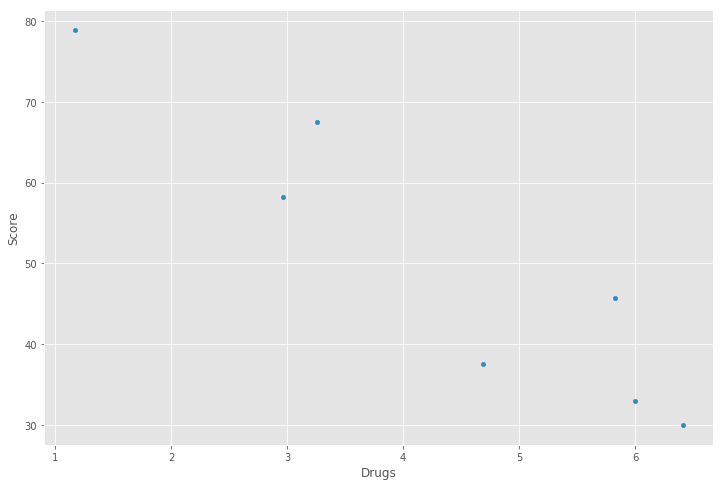

In [6]:
df.plot(x='Drugs', y='Score', kind='scatter')

In [7]:
df.corr()

,Drugs,Score
Drugs,1.000000,-0.936928
Score,-0.936928,1.000000


### Рождаемость в США

Загрузите два набора данных с информацией о рождаемости в США: [Набор 1](https://www.dropbox.com/s/4v743y3e25lz0an/US_births_1994-2003_CDC_NCHS.csv?dl=0), [Набор 2](https://www.dropbox.com/s/3aoulbiuomamay6/US_births_2000-2014_SSA.csv?dl=0)

In [8]:
df1 = pd.read_csv('./data/US_births_1994-2003_CDC_NCHS.csv')
df2 = pd.read_csv('./data/US_births_2000-2014_SSA.csv')

`Pandas` обладает мощным функционалом для работы с временными рядами. Самое главное, пожалуй правильно задать столбец с датой в DataFrame. Вернемся к данным:

In [9]:
df1.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


Функция `pd.to_datetime()` преобразовывать сырые данные с специальный тип Timestamp. Делать это можно одним из нескольких способов:
* Задан столбец, в котором дата записана в виде строчки произвольного формата (например 2016-03-01, 01032016, 01.03.16 ...)
    
    В этом случае вам надо указать в `pd.to_datetime()` [формат](http://strftime.org/) даты


In [11]:
print(pd.to_datetime('2016-03-01', format='%Y-%m-%d'))
print(pd.to_datetime('01032016', format='%d%m%Y'))
print(pd.to_datetime('01-mar-2016', format='%d-%b-%Y'))

2016-03-01 00:00:00
2016-03-01 00:00:00
2016-03-01 00:00:00


* Задано несколько столбцов, скаждый из которых содержит элемент даты (столбец под день, месяц, год)

    Тогда, `pd.to_datetime()` подается 3 столбца из таблицы, которые должны **обязательно** именоваться `['year', 'month', 'day']`

In [12]:
# переименовываем столбец
df1 = df1.rename(columns={'date_of_month': 'day'})

df1.loc[:, 'date'] = \
pd.to_datetime(df1.loc[:, ['year', 'month', 'day']])
df1.head()

,year,month,day,day_of_week,births,date
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


Довольно часто информация о дате передается в формате [unix-timestamp](http://www.onlineconversion.com/unix_time.htm).

В этом случае можно воспользоваться функцией `pd.Timestamp.fromtimestamp()`

In [17]:
pd.Timestamp.fromtimestamp(1453766400)

Timestamp('2016-01-26 03:00:00')

Давайте сделаем дату индексом в нашей таблице.

In [18]:
df1 = df1.set_index('date')
df1.head()

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053


Это дает нам возможность выбирать строчки по нужным датам...

In [19]:
df1.loc['1994-01-01', :]

year           1994
month             1
day               1
day_of_week       6
births         8096
Name: 1994-01-01 00:00:00, dtype: int64

In [21]:
# df1.loc['1994-01-01':'1995-01-01', :]

.. и не только, например

In [22]:
# Аггрегация с нужной частотой
df_aggr = df1.resample(rule='AS')\
             .sum()

In [24]:
df_aggr.head()

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,727810,2382,5738,1462,3952767
1995-01-01,728175,2382,5738,1463,3899589
1996-01-01,730536,2384,5767,1459,3891494
1997-01-01,728905,2382,5738,1459,3880894
1998-01-01,729270,2382,5738,1460,3941553


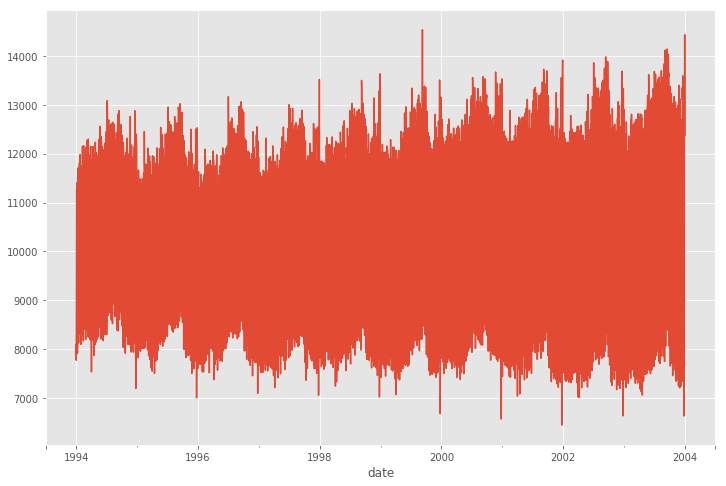

In [25]:
# Визуализация
df1.births.plot(label=u'Исходный ряд')

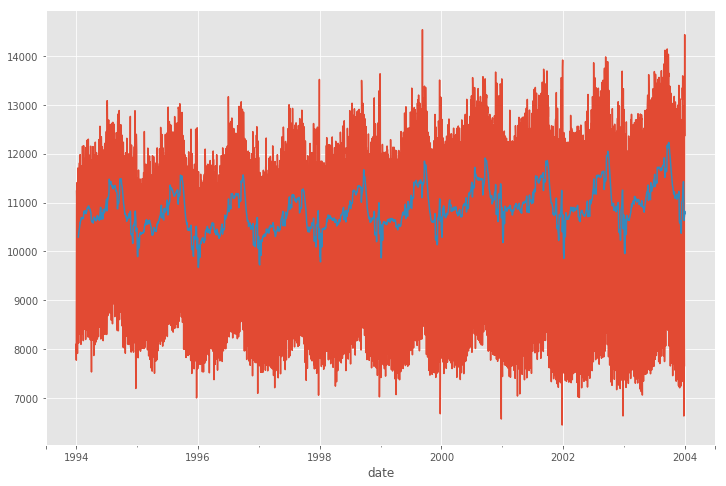

In [27]:
# Визуализация
df1.births.plot(label=u'Исходный ряд')
df1.births.rolling(window=14).mean().plot(label=u'Rolling Mean')

**Задание**<br/>
Преобразуйте дату в таблице df2 аналогично df1. Становится ясно, что периоды данных в этих файлах пересекаются.

Необходимо проверить, что показатели рождаемости слабо отличаются между двумя файлами.

Сравните показатели рождаемости на датах на общих датах

In [31]:
# переименовываем столбец
df2 = df2.rename(columns={'date_of_month': 'day'})

df2.loc[:, 'date'] = \
pd.to_datetime(df2.loc[:, ['year', 'month', 'day']])

df2 = df2.set_index('date')

In [32]:
df2.head()

,year,month,day,day_of_week,births
date,,,,,
2000-01-01,2000,1,1,6,9083
2000-01-02,2000,1,2,7,8006
2000-01-03,2000,1,3,1,11363
2000-01-04,2000,1,4,2,13032
2000-01-05,2000,1,5,3,12558


In [35]:
df_diff = \
df1.loc[:, ['births']].join(df2.loc[:, ['births']], how='inner', rsuffix='_2', lsuffix='_1')

In [39]:
abs(df_diff.births_1 - df_diff.births_2).describe()

count    1461.000000
mean      223.484600
std        68.774771
min        60.000000
25%       170.000000
50%       231.000000
75%       271.000000
max       438.000000
dtype: float64

**Задание**<br/>
Теперь надо аккуратно объединить таблицы, так чтобы соблюсти целостность информации (то есть чтобы на одну дату было по одному наблюдению - из одной из таблиц или среднее по обеим)

**HINT**
`join`, `concat`

In [ ]:
## Your code here

**Задание**<br/>
Найдите количество детей, рождающихся 6, 13 и 20 числа каждого месяца с учетом дня недели.

Выделяется ли как-то пятница 13?

In [ ]:
## Your code here

### Качество вина

Загрузите [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) с информацией о характеристиках вина и его качестве.

In [ ]:
## Your code here

**Задание**<br/>
* Что из себя представляет объект в этом наборе данных? Сколько их?
* Какие признаки описывают объекты? Сколько их?
* Какой признак является целевым?
* Каковы их области значений?
* Есть ли пропуски?

In [ ]:
## Your code and answers here

**Задание**<br/>
Какие признаки больше всего влияют на целевую переменную?

In [ ]:
## Your code here

# Вспоминаем NumPy 
## Линейная регрессия (для нас пока черный ящик)

Загрузите [файл 1](https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv?dl=0) и [файл 2](https://www.dropbox.com/s/f87gm612o144emx/tutorial_dataset_2.csv?dl=0) в папку с тетрадкой. С помощью функции `loadtxt` в модуле `numpy` загрузите табличные данные одного из файлов. Присвойте y = D[:,0] а X = D[:, 1:].

Сейчас мы воспользуемся одной магической формулой и построим модель линейной регрессии. Откуда эта формула берется мы узнаем на следующих занятиях.

Модель линейной регрессии в матричном виде выглядит так: $\hat{y} = X\hat{\beta}$, где

$$ \hat{\beta} = (X^\top X)^{-1} X^\top y $$
Остатки модели рассчитываются как
$$ \text{res} = y - \hat{y} $$

Итак, еще раз:

**Задание**<br/>
1. Загрузите данные
2. Оцените веса $\beta$ с помощью формулы
3. Постройте график, на котором по оси Y: остатки, а по оси X: $\hat{y}$

In [41]:
# load data
D = np.loadtxt('./data/tutorial_dataset_2.csv', 
               skiprows=1, 
               delimiter=',')

In [44]:
y = D[:, 0]
X = D[:, 1:]

In [50]:
Beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [52]:
Beta

array([6.85976194e-04, 1.17459428e+00, 1.08903184e+00, 8.87441294e-01,
       1.00928516e+00])

In [56]:
y_hat = X.dot(Beta)
res = y - y_hat

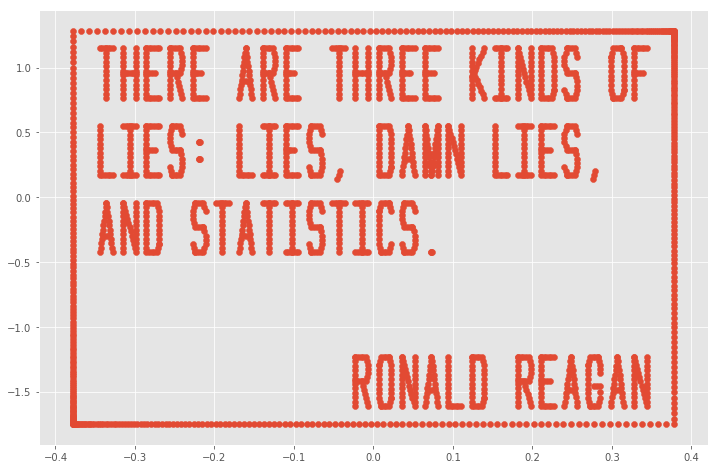

In [57]:
plt.scatter(y_hat, res)

# Попробуем что-то из sklearn
## Sentiment analysis

В папке `/data/sentiment` лежат файлы, связанные с
* imdb.com
* amazon.com
* yelp.com

Формат файла:
<Review>\t<class label>\n


### Task
1. Загрузите данные из файла
2. Обучите линейный классификатор (для нас пока черный ящик)
3. Попробуем проинтерпретировать результат
4. Как будем оценикать качество?

In [60]:
imdb = pd.read_csv('./data/sentiment/imdb_labelled.txt', sep='\t', names=['text', 'label'])

In [61]:
imdb.head()

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
vect = CountVectorizer()
X = vect.fit_transform(imdb.text.values)

In [67]:
imdb.shape

(748, 2)

In [66]:
X

<748x3047 sparse matrix of type '<class 'numpy.int64'>'
	with 11363 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression()

In [70]:
y = imdb.label.values

In [71]:
model.fit(X, y)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
coef = model.coef_[0]

In [75]:
words = vect.get_feature_names()

In [76]:
weights = pd.Series(index=words, data=coef)

In [78]:
weights.sort_values()

bad            -1.872306
awful          -1.333721
stupid         -1.175280
no             -1.139851
cheap          -1.139122
even           -1.091030
would          -1.050318
worst          -1.038377
waste          -1.037806
nothing        -0.974179
little         -0.969756
boring         -0.883416
just           -0.876937
make           -0.873727
how            -0.870910
plot           -0.830202
terrible       -0.787736
annoying       -0.785370
only           -0.777459
ve             -0.770368
mess           -0.738991
shame          -0.721860
free           -0.703715
average        -0.696734
can            -0.691914
avoid          -0.685378
directing      -0.680245
half           -0.677415
slow           -0.670796
embarrassing   -0.655096
                  ...   
mostly          0.677508
must            0.680133
film            0.683956
hilarious       0.692651
give            0.693360
long            0.693632
still           0.694232
nice            0.694942
however         0.695025
